<a href="https://colab.research.google.com/github/shadiyahamza/assignment/blob/main/selftrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load data set
df= pd.read_csv('/content/train.csv.zip')

**understand dataset**

In [ ]:
#show first five row
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
# Show column names
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Basic Data Cleaning

In [ ]:
# Check missing values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df['Postal Code'].fillna(df['Postal Code'].mode()[0],inplace=True)



/tmp/ipython-input-3899036545.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(df['Postal Code'].mode()[0],inplace=True)


Descriptive Statistics

In [ ]:
 df.describe()#summary of numbers

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55222.544694,230.769059
std,2829.160653,32059.043706,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
df.nunique()# unique values per column

,0
Row ID,9800
Order ID,4922
Order Date,1230
Ship Date,1326
Ship Mode,4
Customer ID,793
Customer Name,793
Segment,3
Country,1
City,529


In [ ]:
 #Fix Data Types
 #Convert Order Date and Ship Date to proper date format.
 df['Order Date']= pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce')
 df['Ship Date']= pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce')

In [ ]:
#Remove Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Quick check after cleaning
print("Missing values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nDataset Shape:", df.shape)

Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

Data Types:
 Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

Dataset Shape: (9800, 1

**Exploratory Data Analysis (EDA)**

In [ ]:
# Total Sales by Category
print(df.groupby("Category")["Sales"].sum())
#This shows which product category (Furniture, Office Supplies, Technology) makes the most money.

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64


In [ ]:
# Total Sales by Region
print(df.groupby("Region")["Sales"].sum())
# This tells you which region is most profitable.

Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


In [ ]:
# Top 5 Customers by Sales
print(df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(5))
# Finds your best customers.

Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64


In [ ]:
# Monthly Sales Trend
df['YearMonth'] = df['Order Date'].dt.to_period('M')
print(df.groupby("YearMonth")["Sales"].sum().head(12))  # first 12 months


# This lets us see how sales change over time.

YearMonth
2015-01    14205.7070
2015-02     4519.8920
2015-03    55205.7970
2015-04    27906.8550
2015-05    23644.3030
2015-06    34322.9356
2015-07    33781.5430
2015-08    27117.5365
2015-09    81623.5268
2015-10    31453.3930
2015-11    77907.6607
2015-12    68167.0585
Freq: M, Name: Sales, dtype: float64


In [ ]:
# Average Sales by Ship Mode
print(df.groupby("Ship Mode")["Sales"].mean())


# Checks if some shipping methods bring in higher-value orders.

Ship Mode
First Class       230.228020
Same Day          232.749143
Second Class      236.547939
Standard Class    228.849856
Name: Sales, dtype: float64


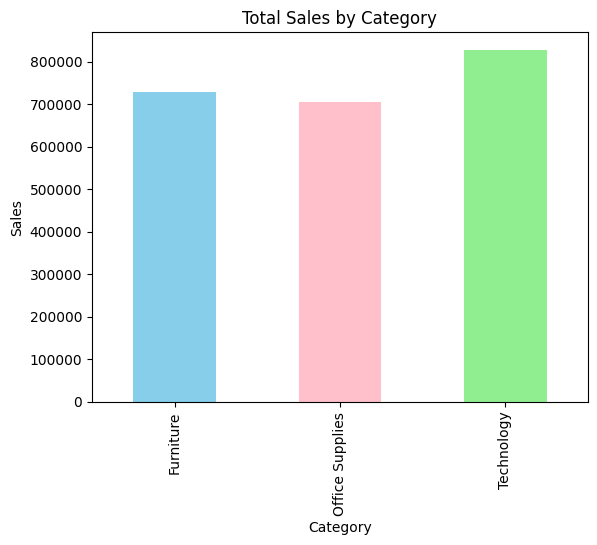

In [ ]:
# Sales by Category (Bar Chart)
category_sales = df.groupby("Category")["Sales"].sum()

category_sales.plot(kind="bar", color=["skyblue", "pink", "lightgreen"])
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.show()

# This shows which category (Furniture, Office Supplies, Technology) earns the most.



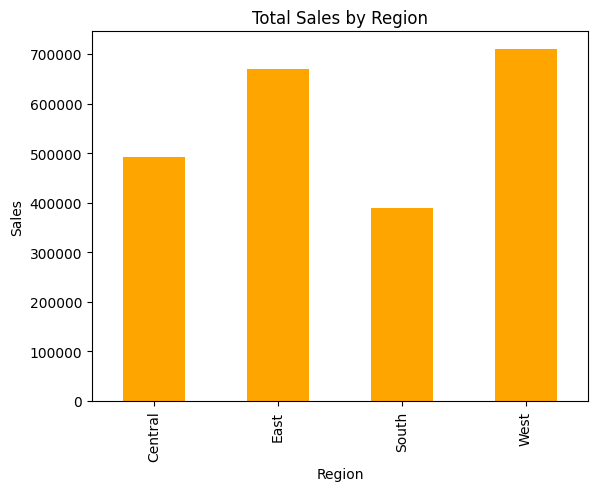

In [ ]:
# Sales by Region (Bar Chart)
region_sales = df.groupby("Region")["Sales"].sum()

region_sales.plot(kind="bar", color="orange")
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.show()

# This shows which region is most profitable.


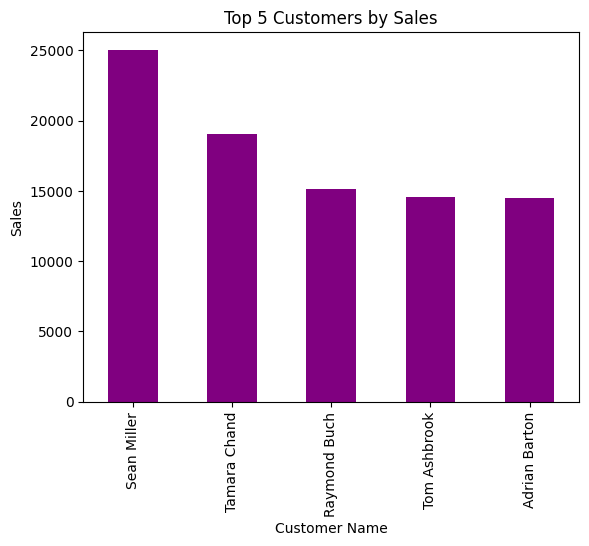

In [ ]:
# Top 5 Customers (Bar Chart)
top_customers = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(5)

top_customers.plot(kind="bar", color="purple")
plt.title("Top 5 Customers by Sales")
plt.ylabel("Sales")
plt.show()

# You’ll see your best customers.


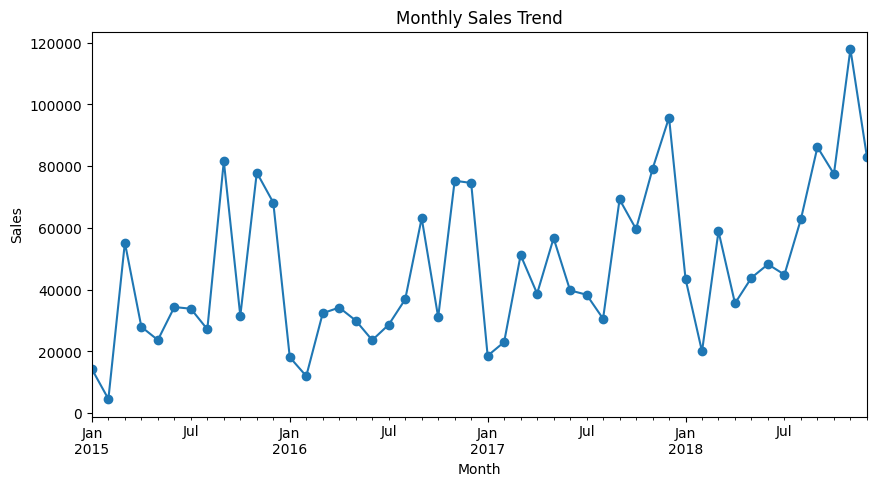

In [ ]:
# Monthly Sales Trend (Line Chart)
df['YearMonth'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby("YearMonth")["Sales"].sum()

monthly_sales.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()


# This shows how sales grow or drop over time.


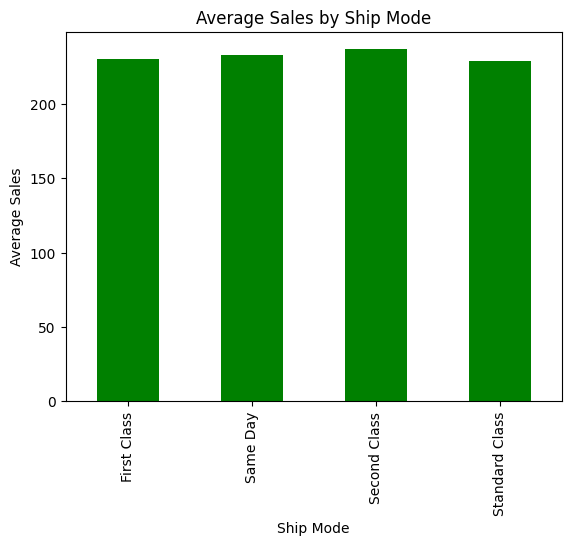

In [ ]:
# Average Sales by Ship Mode (Bar Chart)
shipmode_sales = df.groupby("Ship Mode")["Sales"].mean()

shipmode_sales.plot(kind="bar", color="green")
plt.title("Average Sales by Ship Mode")
plt.ylabel("Average Sales")
plt.show()


# This checks if expensive ship modes bring higher sales.

In [ ]:
df.to_csv("cleaned_data.csv", index=False)
